In [1]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("fmnist_small.csv")
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


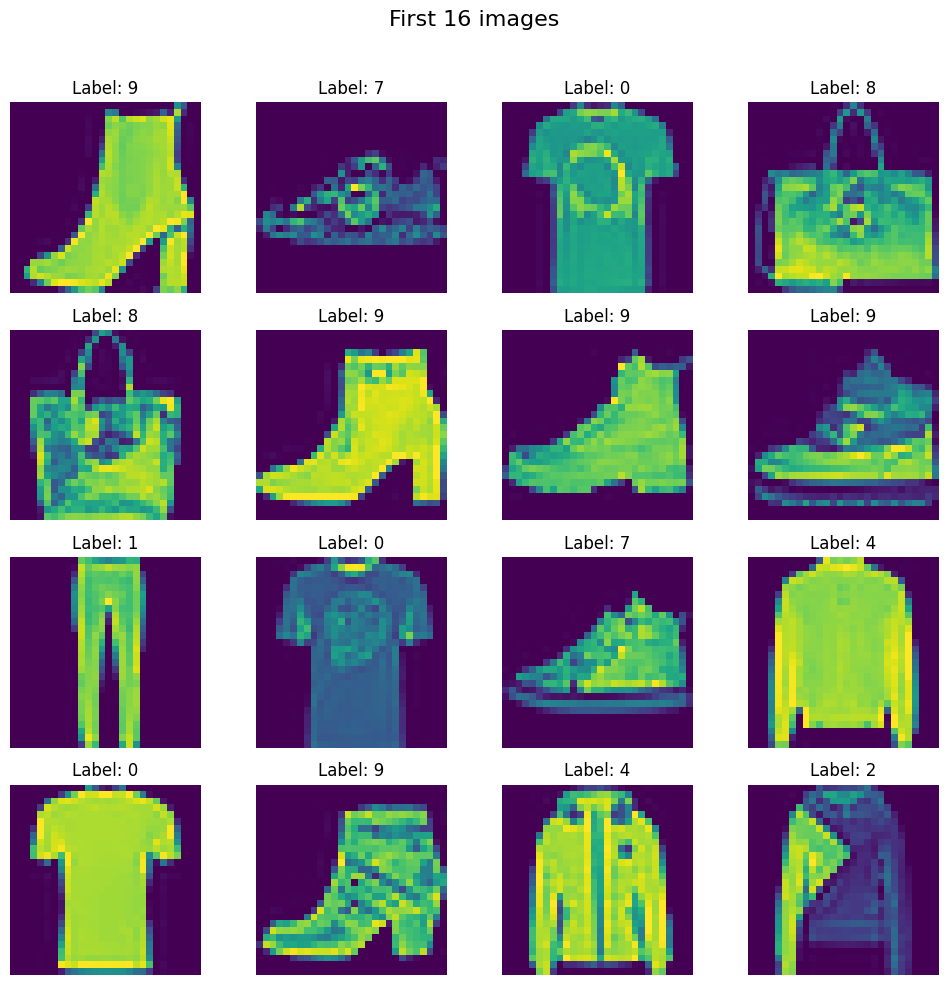

In [3]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):

        self.features = torch.tensor(features.values, dtype=torch.float32)

        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):

        return self.features[index], self.labels[index]


In [11]:
train_dataset = CustomDataset(X_train, y_train)
# print(len(train_dataset))
len(train_dataset)


4800

In [10]:
test_dataset = CustomDataset(X_test, y_test)
len(test_dataset)


1200

In [11]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [12]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )
        self.loss_function = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)


In [13]:
learning_rate = 0.1
epochs = 100


In [14]:
model = MyNN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()


In [15]:
print(model.parameters())


<generator object Module.parameters at 0x0000028517DA9540>


In [16]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
for epoch in range(epochs):
    total_epoch_loss = 0

    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)

        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    total_epoch_loss += loss.item()
    avg_epoch_loss = total_epoch_loss / len(train_loader)

    if epoch % 10 == 0:
        print(
            "Epoch: {}/{}... ".format(epoch, epochs),
            "Loss: {:.6f}...".format(avg_epoch_loss),
        )
        # "Val Loss: {:.6f}".format(evaluate(model, val_loader, criterion)));


Epoch: 1/100...  Loss: 0.006103...
Epoch: 11/100...  Loss: 0.001461...
Epoch: 21/100...  Loss: 0.001885...
Epoch: 31/100...  Loss: 0.001011...
Epoch: 41/100...  Loss: 0.000261...
Epoch: 51/100...  Loss: 0.001030...
Epoch: 61/100...  Loss: 0.000762...
Epoch: 71/100...  Loss: 0.000020...
Epoch: 81/100...  Loss: 0.000318...
Epoch: 91/100...  Loss: 0.000212...


In [18]:
model.eval()


MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
  (loss_function): CrossEntropyLoss()
)

In [19]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        print(predicted)
        total += batch_labels.shape[0]
        correct += (predicted == batch_labels).sum().item()
    pass

print(
    "Accuracy of the network on the 1200 test images: %d %%" % (100 * correct / total)
)


tensor([7, 0, 5, 6, 3, 2, 5, 4, 9, 7, 0, 6, 4, 0, 5, 1, 7, 7, 6, 0, 4, 0, 2, 0,
        9, 6, 9, 4, 0, 1, 5, 6])
tensor([4, 8, 1, 6, 9, 3, 9, 6, 8, 5, 3, 1, 2, 3, 8, 9, 9, 9, 5, 0, 4, 0, 0, 4,
        1, 4, 8, 4, 2, 3, 0, 8])
tensor([0, 1, 4, 1, 4, 7, 6, 8, 2, 1, 8, 2, 3, 2, 4, 9, 1, 3, 7, 9, 4, 6, 4, 7,
        0, 4, 1, 3, 6, 1, 2, 6])
tensor([8, 3, 7, 1, 6, 5, 4, 2, 8, 7, 8, 5, 6, 5, 2, 3, 7, 9, 9, 7, 1, 6, 6, 6,
        1, 7, 1, 9, 7, 2, 0, 5])
tensor([6, 3, 5, 7, 9, 1, 9, 1, 5, 7, 1, 1, 5, 0, 1, 1, 9, 8, 0, 3, 3, 9, 8, 9,
        4, 4, 2, 6, 2, 6, 5, 2])
tensor([3, 4, 5, 4, 8, 4, 3, 8, 5, 9, 2, 8, 6, 6, 1, 5, 9, 9, 8, 5, 9, 2, 4, 5,
        0, 9, 1, 2, 4, 1, 4, 6])
tensor([6, 3, 6, 8, 1, 3, 3, 6, 2, 6, 1, 2, 7, 7, 0, 9, 1, 3, 6, 7, 9, 6, 2, 0,
        3, 0, 9, 7, 1, 9, 0, 3])
tensor([7, 1, 6, 9, 9, 0, 5, 1, 7, 0, 8, 2, 7, 6, 9, 3, 3, 7, 6, 2, 3, 5, 9, 4,
        4, 0, 4, 3, 1, 0, 2, 9])
tensor([4, 8, 0, 0, 4, 4, 1, 8, 0, 0, 0, 1, 1, 1, 6, 8, 0, 0, 1, 2, 5, 0, 6, 3,
        4, 3, 7,